# 탐색적 데이터 분석
## 1. 작업준비
### 1) 패키지 참조

In [1]:
import sys
sys.path.append('../')
import helper

import numpy as np
from pandas import read_excel, merge, DataFrame, get_dummies
from matplotlib import pyplot as plt
import seaborn as sb

### 2) 데이터 가져오기

In [2]:
origin = read_excel('분석용데이터.xlsx')
print(origin.shape)
print(origin.info())
origin.head()

(265928, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265928 entries, 0 to 265927
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   기준_년_코드    265928 non-null  int64 
 1   기준_분기_코드   265928 non-null  int64 
 2   상권_코드      265928 non-null  int64 
 3   분기당_매출_금액  265928 non-null  int64 
 4   주중_매출_금액   265928 non-null  int64 
 5   주말_매출_금액   265928 non-null  int64 
 6   남성_매출_금액   265928 non-null  int64 
 7   여성_매출_금액   265928 non-null  int64 
 8   점포수        265928 non-null  int64 
 9   Covid19    265928 non-null  int64 
 10  일과시간_금액    265928 non-null  int64 
 11  일과이후_금액    265928 non-null  int64 
 12  청년금액       265928 non-null  int64 
 13  중년금액       265928 non-null  int64 
 14  장년금액       265928 non-null  int64 
 15  상권_코드_명    265928 non-null  object
 16  엑스좌표_값     265928 non-null  int64 
 17  와이좌표_값     265928 non-null  int64 
 18  시군구_코드     265928 non-null  int64 
 19  행정동_코드     265928 non-null  int

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,Covid19,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구코드,시군구명,도심,총_직장_인구_수,총_생활인구_수
0,2018,3,1000094,182447499,181667733,779766,81108758,83644304,5,0,...,마장로39길,203915,452058,11200,11200540,11200,성동구,False,3118,1272175
1,2018,3,1000094,4561081,3428057,1133024,0,4561081,2,0,...,마장로39길,203915,452058,11200,11200540,11200,성동구,False,3118,1272175
2,2018,3,1000094,86293109,78208220,8084889,38252844,48040265,1,0,...,마장로39길,203915,452058,11200,11200540,11200,성동구,False,3118,1272175
3,2018,3,1000094,93941608,60508224,33433384,45574085,36140265,1,0,...,마장로39길,203915,452058,11200,11200540,11200,성동구,False,3118,1272175
4,2018,3,1000094,1692325089,1354744541,337580548,489138378,195886445,1,0,...,마장로39길,203915,452058,11200,11200540,11200,성동구,False,3118,1272175


- 결측치 확인

In [3]:
print(origin.isna().sum())

기준_년_코드      0
기준_분기_코드     0
상권_코드        0
분기당_매출_금액    0
주중_매출_금액     0
주말_매출_금액     0
남성_매출_금액     0
여성_매출_금액     0
점포수          0
Covid19      0
일과시간_금액      0
일과이후_금액      0
청년금액         0
중년금액         0
장년금액         0
상권_코드_명      0
엑스좌표_값       0
와이좌표_값       0
시군구_코드       0
행정동_코드       0
시군구코드        0
시군구명         0
도심           0
총_직장_인구_수    0
총_생활인구_수     0
dtype: int64


### 3) 명목형 변수에 대한 데이터 타입 변경

In [4]:
df = origin.astype({
    '기준_년_코드': 'category', 
    '기준_분기_코드': 'category', 
    'Covid19': 'category', 
    '상권_코드': 'category', 
    '상권_코드_명': 'category', 
    '시군구_코드': 'category', 
    '행정동_코드': 'category', 
    '시군구명': 'category', 
    '시군구코드': 'category', 
    '도심': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265928 entries, 0 to 265927
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   기준_년_코드    265928 non-null  category
 1   기준_분기_코드   265928 non-null  category
 2   상권_코드      265928 non-null  category
 3   분기당_매출_금액  265928 non-null  int64   
 4   주중_매출_금액   265928 non-null  int64   
 5   주말_매출_금액   265928 non-null  int64   
 6   남성_매출_금액   265928 non-null  int64   
 7   여성_매출_금액   265928 non-null  int64   
 8   점포수        265928 non-null  int64   
 9   Covid19    265928 non-null  category
 10  일과시간_금액    265928 non-null  int64   
 11  일과이후_금액    265928 non-null  int64   
 12  청년금액       265928 non-null  int64   
 13  중년금액       265928 non-null  int64   
 14  장년금액       265928 non-null  int64   
 15  상권_코드_명    265928 non-null  category
 16  엑스좌표_값     265928 non-null  int64   
 17  와이좌표_값     265928 non-null  int64   
 18  시군구_코드     265928 non-null  category
 19  행정

## 2. 명목형 변수에 대한 기초 통계량 확인
- 각 컬럼의 데이텉타입을 확인

In [5]:
df.dtypes

기준_년_코드      category
기준_분기_코드     category
상권_코드        category
분기당_매출_금액       int64
주중_매출_금액        int64
주말_매출_금액        int64
남성_매출_금액        int64
여성_매출_금액        int64
점포수             int64
Covid19      category
일과시간_금액         int64
일과이후_금액         int64
청년금액            int64
중년금액            int64
장년금액            int64
상권_코드_명      category
엑스좌표_값          int64
와이좌표_값          int64
시군구_코드       category
행정동_코드       category
시군구코드        category
시군구명         category
도심           category
총_직장_인구_수       int64
총_생활인구_수        int64
dtype: object

- 명목형 변수의 이름을 추출

In [6]:
cnames = []
for i, v in enumerate(df.dtypes):
    if v == 'category':
        cnames.append(df.columns[i])
cnames

['기준_년_코드',
 '기준_분기_코드',
 '상권_코드',
 'Covid19',
 '상권_코드_명',
 '시군구_코드',
 '행정동_코드',
 '시군구코드',
 '시군구명',
 '도심']

- 명목형 변수로만 구성된 새로운 데이터프레임을 생성

In [7]:
cdf = df[cnames]
print(cdf.isna().sum())
cdf

기준_년_코드     0
기준_분기_코드    0
상권_코드       0
Covid19     0
상권_코드_명     0
시군구_코드      0
행정동_코드      0
시군구코드       0
시군구명        0
도심          0
dtype: int64


,기준_년_코드,기준_분기_코드,상권_코드,Covid19,상권_코드_명,시군구_코드,행정동_코드,시군구코드,시군구명,도심
0,2018,3,1000094,0,마장로39길,11200,11200540,11200,성동구,False
1,2018,3,1000094,0,마장로39길,11200,11200540,11200,성동구,False
2,2018,3,1000094,0,마장로39길,11200,11200540,11200,성동구,False
3,2018,3,1000094,0,마장로39길,11200,11200540,11200,성동구,False
4,2018,3,1000094,0,마장로39길,11200,11200540,11200,성동구,False
...,...,...,...,...,...,...,...,...,...,...
265923,2021,1,1000651,1,우마길,11530,11530595,11530,구로구,False
265924,2021,1,1000651,1,우마길,11530,11530595,11530,구로구,False
265925,2021,1,1000651,1,우마길,11530,11530595,11530,구로구,False
265926,2021,1,1000651,1,우마길,11530,11530595,11530,구로구,False


- 확인이 필요한 컬럼에 대한 `카운트플롯`
    - `seaborn.countplot()`을 확인하여 각 명목형 변수들의 데이터 분포가 비슷하게 되어있으면 (-> '표준 정규 분포' 또는 '표준분포'로 되어 있다) 그냥 써도 됨
	-  데이터 분포가 비슷하게 되어있지 않으면 `표준화` 하는 것이 이상적

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


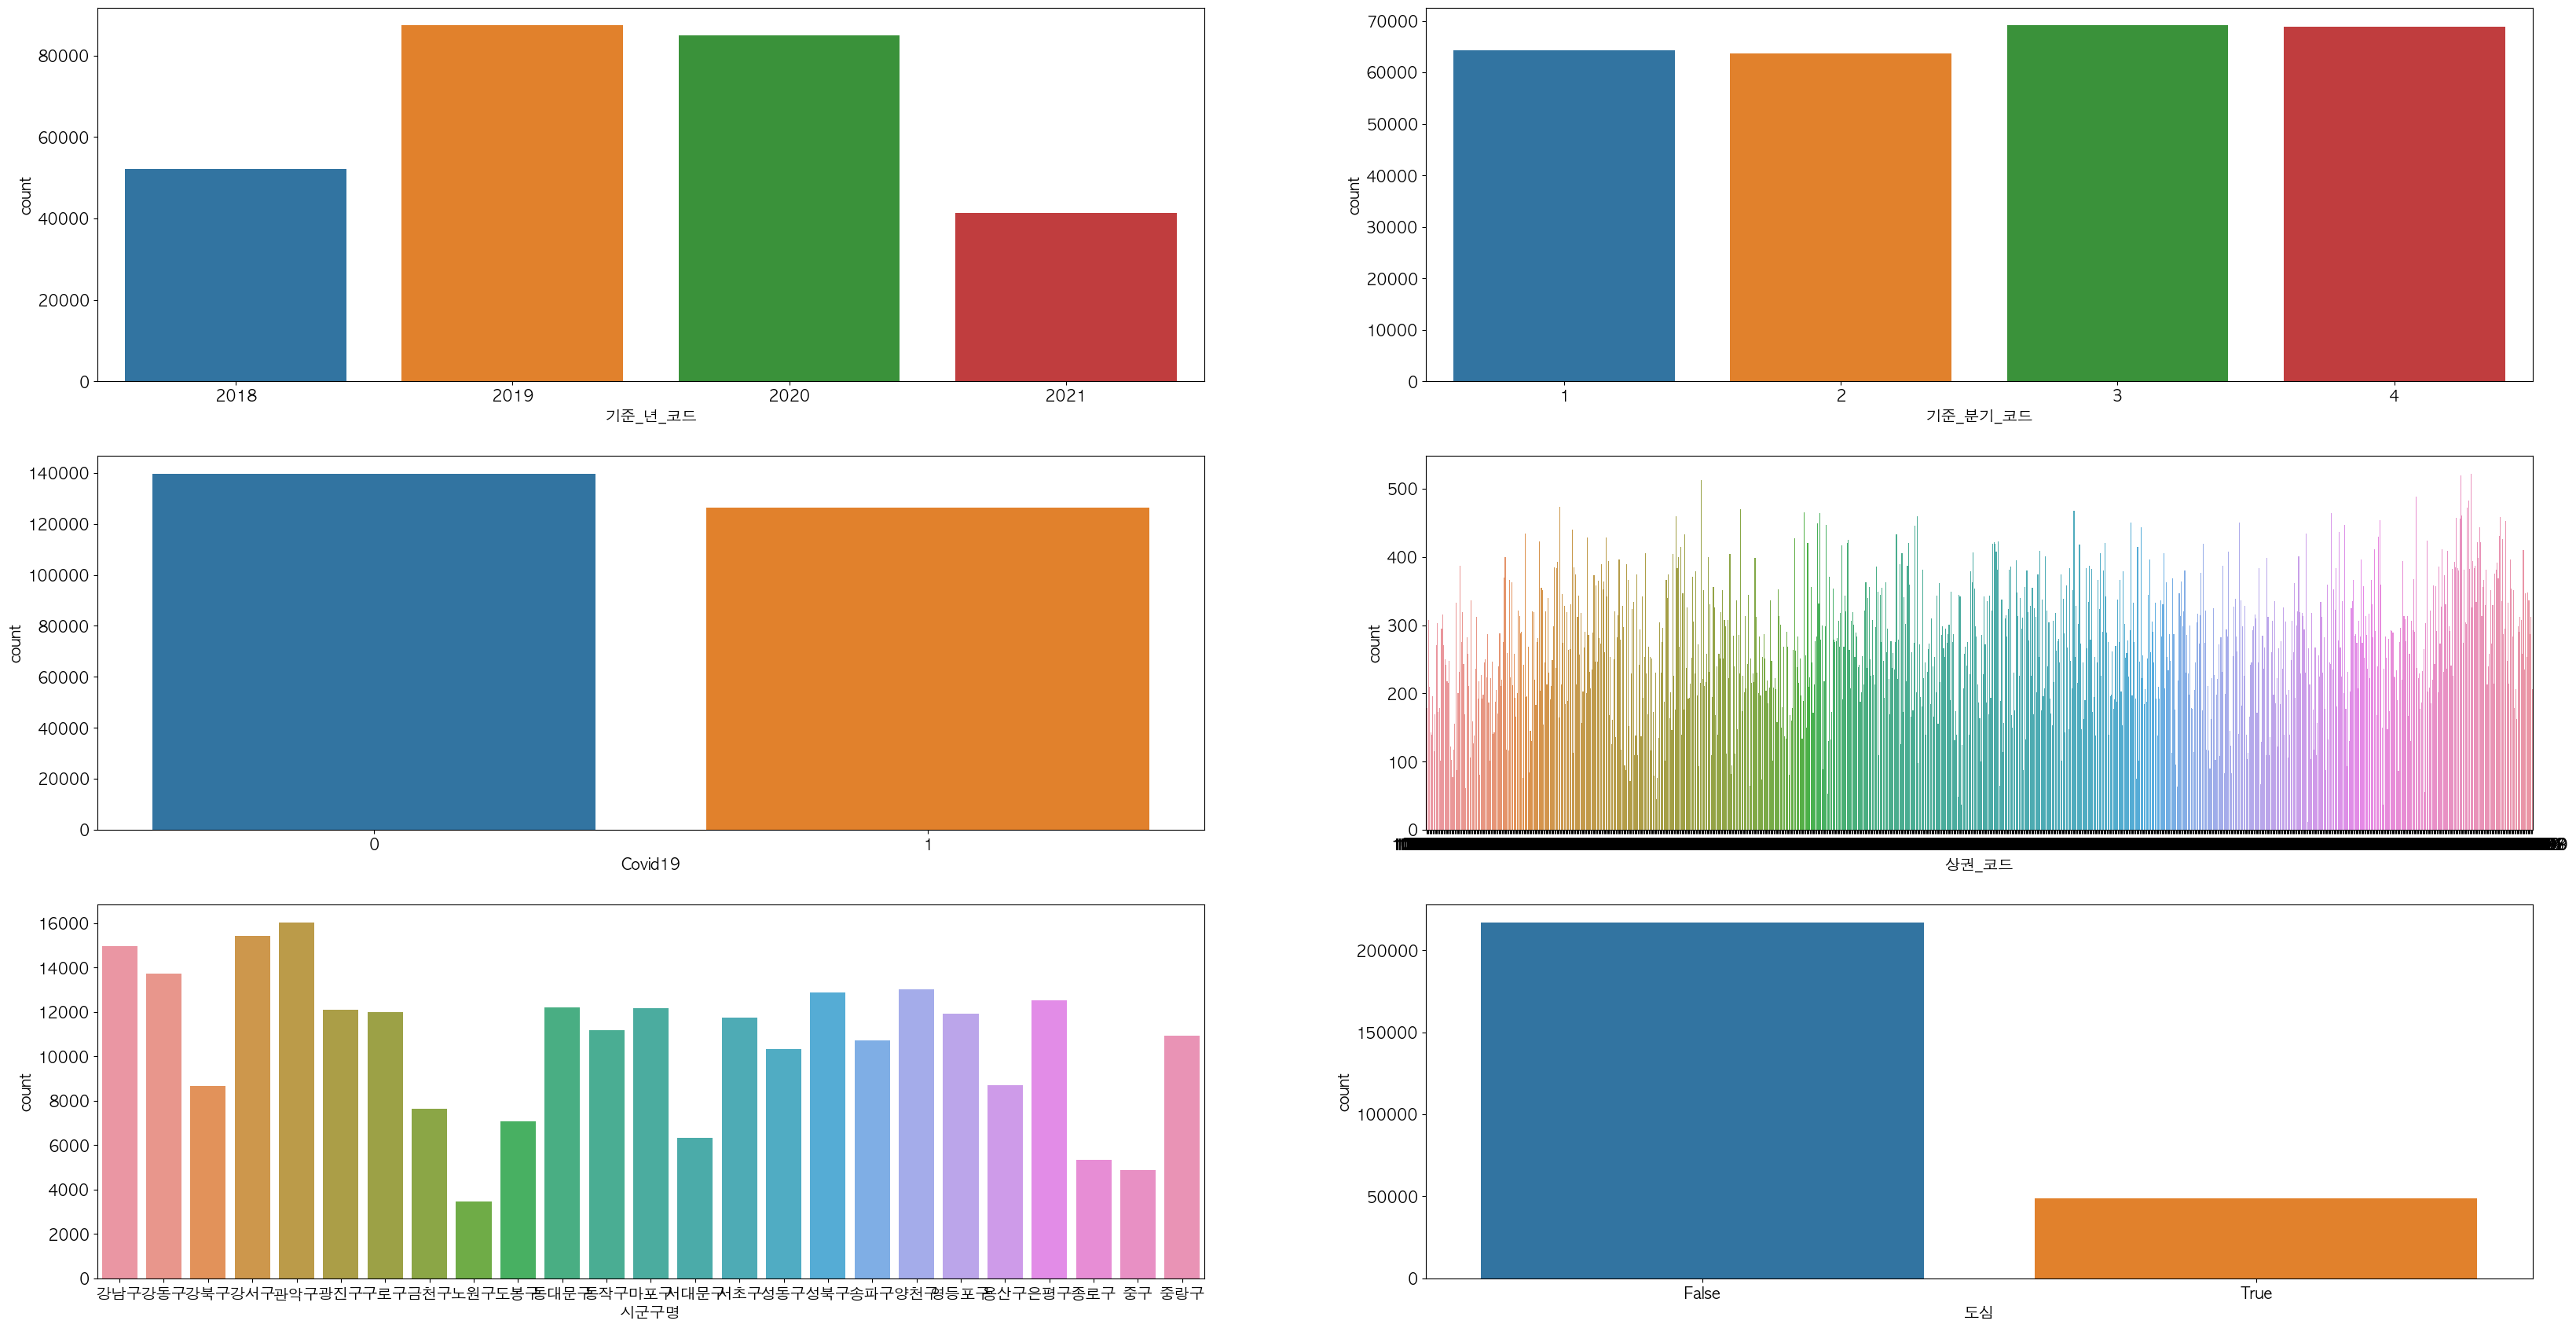

In [8]:
target = ['기준_년_코드','기준_분기_코드','Covid19','상권_코드','시군구명','도심']
rows = round(len(target)/2)
fig, ax = plt.subplots(rows, 2, figsize = (40, 7*rows))
for i, v in enumerate(target):
    r = int(i/2)
    c = i % 2
    sb.countplot(x=v,
                 data=cdf,
                 ax=ax[r][c])
plt.show()
plt.close()

> 데이터의 분포가 얼추 비슷하게 되어 있는 것으로 확인 (각 컬럼 별)

## 3. 연속형 변수에 대한 기초 통계량 확인
- 구 단위 코로나 전후 매출액 비교

In [9]:
tmp = df.filter(['시군구명', 
                 'Covid19', 
                 '분기당_매출_금액']).groupby(['시군구명', 
                                            'Covid19'],
                                            as_index=False).mean()
print(tmp.isna().sum())
tmp

시군구명         0
Covid19      0
분기당_매출_금액    0
dtype: int64


/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_3063/371123631.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.filter(['시군구명',


,시군구명,Covid19,분기당_매출_금액
0,강남구,0,3.777450e+08
1,강남구,1,4.067136e+08
2,강동구,0,2.207858e+08
3,강동구,1,2.341338e+08
4,강북구,0,1.810091e+08
5,강북구,1,1.767230e+08
6,강서구,0,2.114053e+08
7,강서구,1,2.244594e+08
8,관악구,0,2.043014e+08
9,관악구,1,2.015775e+08


- 비교 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


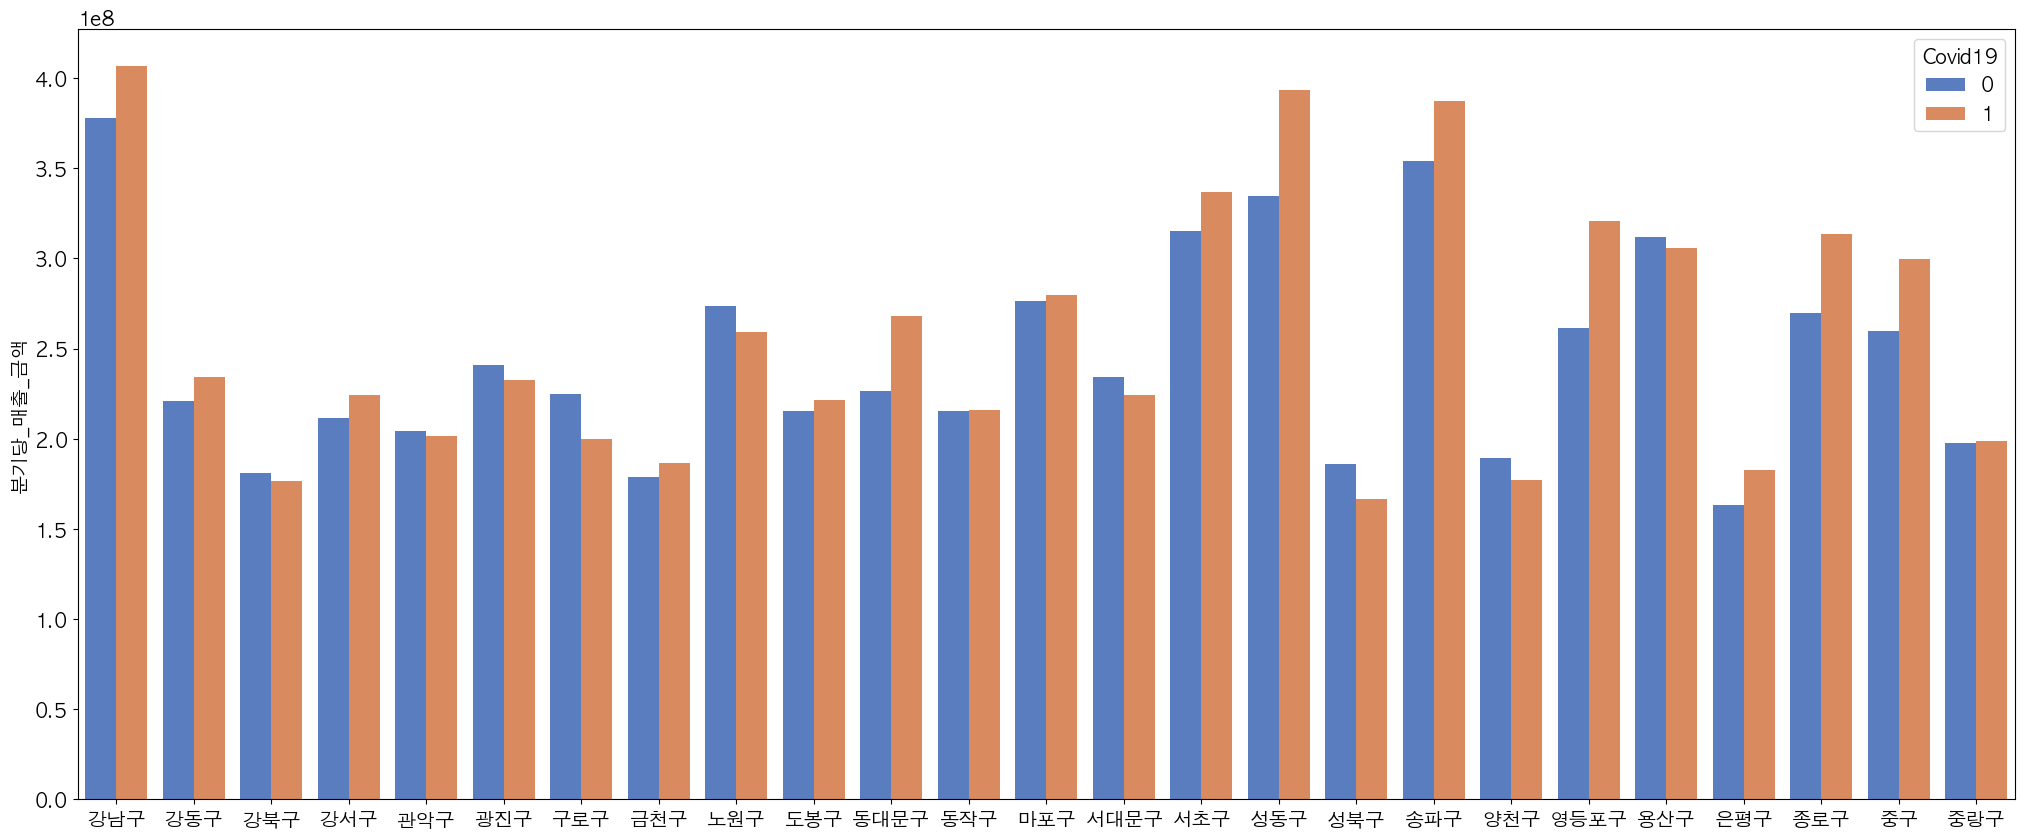

In [10]:
plt.figure(figsize = (25, 10))
sb.barplot(data = tmp, x='시군구명', y='분기당_매출_금액',
           hue = 'Covid19', palette = 'muted')
plt.xlabel(None)
plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
plt.show()
plt.close()

> 위에서는 모든 데이터가 양의 값을 갖지만 (표준 편타 전의 데이터로 그린 barplot이기 때문에) `표준편차`를 해놓고 그린 barplot은 `양과 음의 결과`가 나올 것이다.
>
> 표준 편차 전의 데이터로 한 경우나 minmaxscaler를 사용했을 경우 그래프가 밑으로(음의 수) 내려가는 경우는 없을 것이다.

- 기초통계량 확인

In [11]:
tmp = df.drop(['엑스좌표_값', '와이좌표_값'], axis = 1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.491156e+08,7.155273e+08,8.0,19385254.00,67958130.0,2.206690e+08,9.334306e+10
주중_매출_금액,1.890894e+08,5.802866e+08,-70301897.0,14401136.50,50635893.0,1.665412e+08,9.060803e+10
주말_매출_금액,6.002625e+07,1.844163e+08,-60053636.0,2470771.25,13580866.5,5.077027e+07,1.187360e+10
남성_매출_금액,1.211154e+08,3.546736e+08,0.0,7635753.25,30244104.5,1.046423e+08,4.468054e+10
여성_매출_금액,1.038996e+08,3.202041e+08,-7499697.0,6644129.75,26931961.0,9.149827e+07,2.358525e+10
점포수,4.665669e+00,6.393126e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.367521e+08,4.979091e+08,-23926190.0,6570390.00,30422435.5,1.143886e+08,6.369344e+10
일과이후_금액,1.123635e+08,3.054073e+08,-86927726.0,6528123.75,26460168.5,9.311159e+07,2.964962e+10
청년금액,8.026617e+07,2.244493e+08,-3685222.0,3439479.50,16588339.0,6.560932e+07,1.568936e+10
중년금액,1.074401e+08,3.482783e+08,0.0,7668618.25,28746872.0,9.204336e+07,3.420627e+10


- 상자그림 확인

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

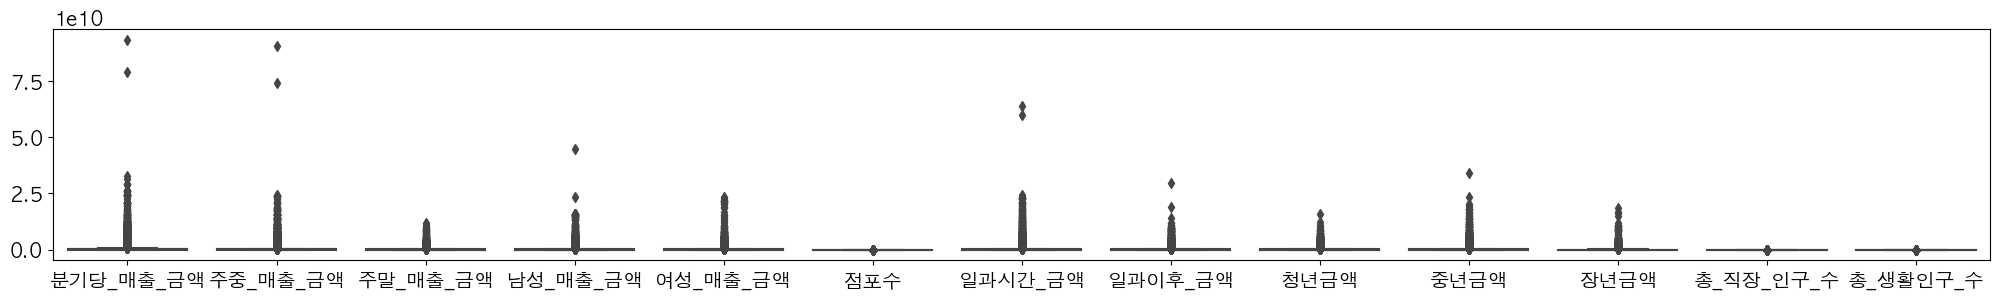

In [12]:
plt.figure(figsize = (25, 3))
sb.boxplot(tmp)
plt.show()
plt.close()

> 무조건 표준화 해야한다고 판단!

## 4. 최종 데이터프레임 저장

In [13]:
# df.to_excel('골목상권_코로나전후_매출액비교.xlsx', index=False)